In [205]:
import pandas as pd
import scipy as sp
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt

data = pd.read_csv('/data/pepper/combined_single_body.csv')

In [206]:
p1_e1_hand = data[(data.pNum == 5) & (data.eNum == 1) & (data.jointName == 'ElbowRight')]

y_array = p1_e1_hand['y'].values

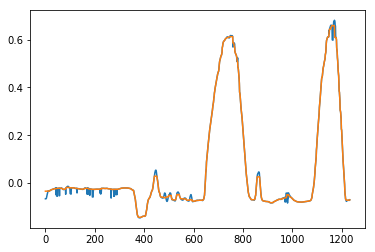

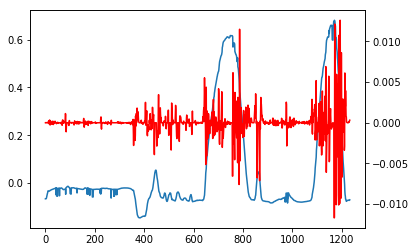

In [207]:
y_mf = signal.medfilt(y_array, 21)
plt.plot(y_array)
plt.plot(y_mf)
plt.show()
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(y_array)
#plt.plot(y_mf, color='red')
#plt.show()

y_mf_grad = np.gradient(np.gradient(y_mf))

#plt.plot(np.gradient(np.gradient(y_array)), 'blue')
ax2.plot(y_mf_grad, 'red')
#plt.xticks(np.arange(0, 600, 100))
plt.show()

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


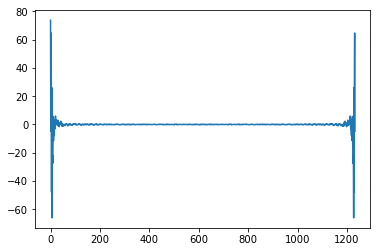

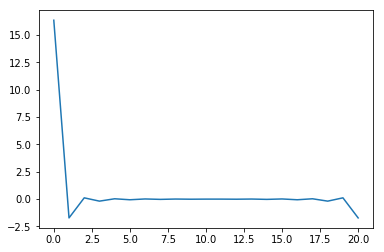

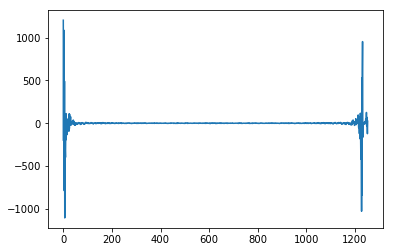

In [208]:
window = signal.general_gaussian(21, p=0.5, sig=10)
y_fft = sp.fft(y_array)
plt.plot(y_fft)
plt.show()
window_fft = sp.fft(window)
plt.plot(window_fft)
plt.show()
y_w_c = np.convolve(window_fft, y_fft)
plt.plot(y_w_c)
plt.show()


/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:785: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:818: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:785: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1)

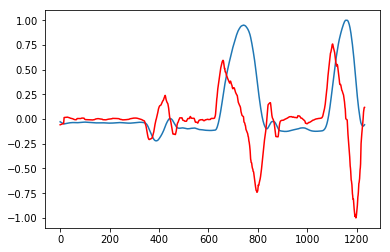

In [209]:
from sklearn.preprocessing import MaxAbsScaler 
max_abs_scaler = MaxAbsScaler()
n = 31
meaned = max_abs_scaler.fit_transform((np.convolve(y_mf, np.ones((n, )) / n, mode='same')))
plt.plot(meaned)
max_abs_scaler = MaxAbsScaler()
meaned_gg = np.gradient(meaned)
meaned_gg = max_abs_scaler.fit_transform(meaned_gg)

plt.plot(meaned_gg, color='red')
#plt.plot(0.25, 'k')
plt.show()